# Imports

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Loading the Data

In [3]:
path = '/content/drive/MyDrive/Springboard/CapstoneProject2/data/coupon_data1.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1
1,1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,0
2,2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1
3,3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0
4,4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,0


# 2. Pre-processing

##Data Info 

In [4]:
df.shape

(12007, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            12007 non-null  int64 
 1   destination           12007 non-null  object
 2   passanger             12007 non-null  object
 3   weather               12007 non-null  object
 4   temperature           12007 non-null  int64 
 5   time                  12007 non-null  object
 6   coupon                12007 non-null  object
 7   expiration            12007 non-null  object
 8   gender                12007 non-null  object
 9   age                   12007 non-null  object
 10  maritalStatus         12007 non-null  object
 11  has_children          12007 non-null  int64 
 12  education             12007 non-null  object
 13  occupation            12007 non-null  object
 14  income                12007 non-null  object
 15  Bar                   12007 non-null

In [6]:
df = df.iloc[:,1:]

##X and Y 

In [7]:
X = df.iloc[:,:22]

In [8]:
X

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1
12003,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,0
12004,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1
12005,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0


In [9]:
y = df.iloc[:,22]

##Create dummy variable

In [10]:
object_df = X.select_dtypes(include='object')
object_df.head()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
2,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
3,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Male,21,Single,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1


In [11]:
dummy_df1 = pd.get_dummies(object_df)
dummy_df1.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),...,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


* Since the other coulums with type in64 are categorical variables, we also need to change them in to dummy variables

In [12]:
obj_cols = object_df.columns
non_obj_df = X.iloc[:, ~X.columns.isin(obj_cols)]
dummy_df2 = pd.get_dummies(non_obj_df.astype('object'))
dummy_df2.head()

,temperature_30,temperature_55,temperature_80,has_children_0,has_children_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1
0,0,1,0,1,0,1,0,1,0,1,0
1,0,0,1,1,0,1,0,1,0,1,0
2,0,0,1,1,0,1,0,1,0,1,0
3,0,0,1,1,0,0,1,1,0,1,0
4,0,0,1,1,0,1,0,1,0,1,0


##Create new data frame 

In [13]:
X = pd.concat([dummy_df1,dummy_df2], axis=1)
X.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),...,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature_30,temperature_55,temperature_80,has_children_0,has_children_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
3,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0


# 3. Splitting the data into train and test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

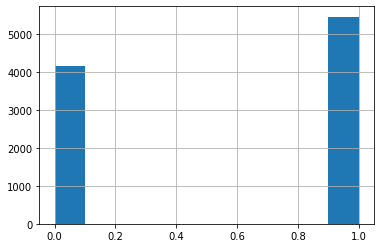

In [18]:
y_train.hist()

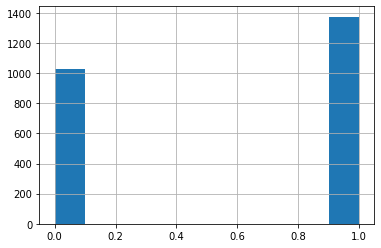

In [19]:
y_test.hist()

* Distribution of the train and test are similar to each other.

# Save the Date Set for later use

In [22]:
result = pd.concat([X,y],axis=1)

In [23]:
result.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),...,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature_30,temperature_55,temperature_80,has_children_0,has_children_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,Y
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0


In [25]:
path = '/content/drive/MyDrive/Springboard/CapstoneProject2/data/coupon_data2.csv'
result.to_csv(path)